# Parcial 2 -  Enunciados

Considere las tres series de tiempo que aparecen en cada una de las hojas de excel del archivo __datos_parcial2.xlsx__.

Importe cada una de las tres series de tiempo y para cada una de ellas resuelva lo siguiente en Python:

1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.

3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.

7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

## PUNTO 2

## 1. 

In [2]:
import pandas as pd # Para importar las BD
import numpy as np # Para trabajar con vectores, matrices y funciones especiales
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
plt.style.use('fivethirtyeight') # Para dar un estilo distinto a los gráficos

def printfuller(test_res):
    """ null hypothesis is that a unit root is present in a time series sample."""
    print("Prueba de Dickey Fuller")
    print(f"The test statistic: \t {round(test_res[0], 10)}")
    print(f"p-value: \t \t {test_res[1]}")

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name= "datos2")

In [4]:
data.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [5]:
data.shape

(521, 2)

In [6]:
data.set_index("date", inplace=True)

In [7]:
data

,value
date,
2020-01-01,-0.89
2020-01-02,-0.99
2020-01-03,-1.62
2020-01-04,-1.13
2020-01-05,-0.91
...,...
2021-05-31,-92.78
2021-06-01,-91.90
2021-06-02,-92.96


Se transforman los datos a un formato deseado, como se puede ver la serie tiene 521 observaciones que van desde 1 de enero de 2020 hasta el 4 de junio de 2021

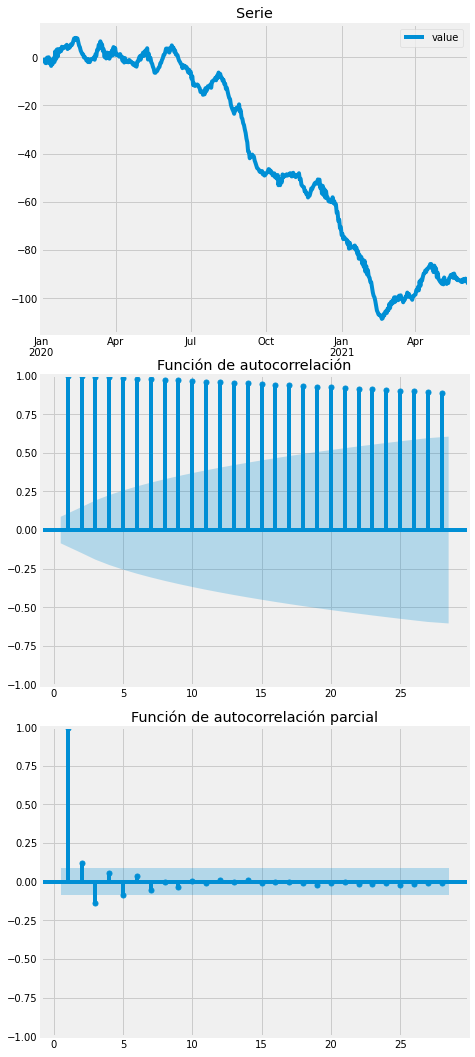

In [8]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
data.plot(ax=ax[0], title = "Serie", xlabel="")
plot_acf(data, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(data, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

Se puede ver en el primer grafico que la serie no parece ser estacionaria.

El grafico de la ACF nos puede ayudar para ver si la diferenciación es necesaria. Si el polinomio $φ(z)(1 − z)^d$ tiene una raiz unitaria, la ACF muestral no va a decaer a 0 rapidamente mientras los Lags incrementan. Este lento decaimiento nos indica que una diferenciacion es necesaria. 

Como podemos ver en el grafico de la ACF mientras se aumenta los Lags se decae lentamente. Para confirmar nuestras sospechas vamos a realizar la prueba Dickey Fuller

## 2.

In [9]:
test = adfuller(data)
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -0.1828263553
p-value: 	 	 0.9405379503085114


Se realiza el test de Aumentado de Dickey-Fuller y se no rechaza entonces puedo afirmar que hay una raiz unitaria presente y el modelo no es estacionario.

Por esta razón hago una diferencia a mis datos originales, se pierde un dato ya que el primer registro de la serie no tiene un dato anterior para generar esta diferencia.

In [10]:
data_no_diff = data.copy()
data = data.value.diff().dropna()
data

date
2020-01-02   -0.10
2020-01-03   -0.63
2020-01-04    0.49
2020-01-05    0.22
2020-01-06   -1.46
              ... 
2021-05-31   -0.75
2021-06-01    0.88
2021-06-02   -1.06
2021-06-03    0.00
2021-06-04   -1.28
Name: value, Length: 520, dtype: float64

## 3.

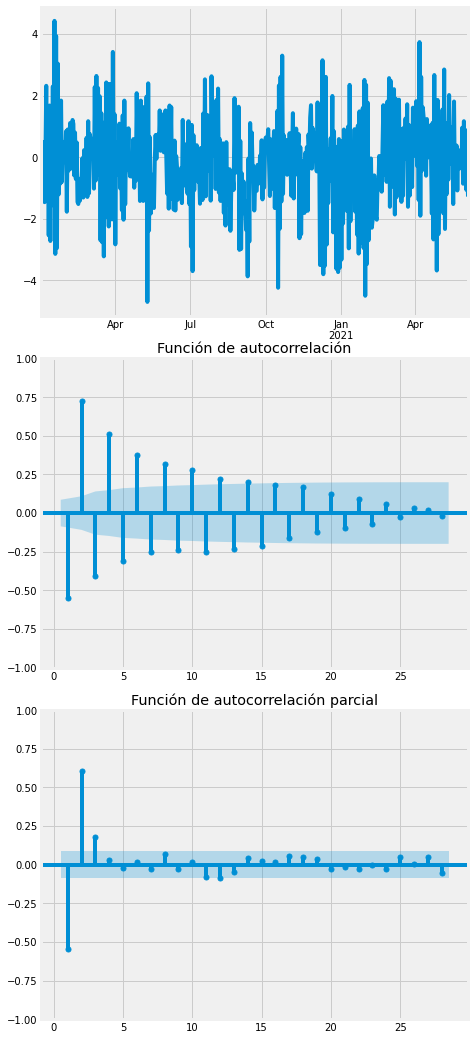

In [11]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
data.plot(ax=ax[0], xlabel = "")
plot_acf(data, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(data, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

In [12]:
test = adfuller(data)
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -7.5240555018
p-value: 	 	 3.724992856728212e-11


Como podemos ver en el grafico de la ACF ya no se ve un muy lento decaimiento, en su caso se puede ver que tiene una cola que decae de forma senoidal.
En la grafico de la PACF se ve un corte en el Lag 3. De forma grafica se podria pensar en un modelo ARIMA(2, 1, 0) pero se plantearan otros modelos para compararlos.

Para confirmar que ya no se necesitan hacer mas diferencias se hace de nuevo el test de Dickey-Fuller y se obtiene un rechazo de la hipotesis nula y se afirma que no hay raices unitarias, la serie con una diferencia es estacionaria.

## 4.

Se obtendran 9 modelos, estos rangos se eligieron observando las ACF y PACF

In [13]:
pdq_l = [(p, 1, q) for p in [1, 2, 3] for q in [0, 1, 2]] # ARIMA(0:3, 1, 0:2)

In [14]:
filas = []
for order in pdq_l:
    fit = ARIMA(data_no_diff, order=order).fit()
    aic = fit.aic
    bic = fit.bic
    filas.append([order, aic, bic])

In [15]:
pd.DataFrame(filas, columns=["order", "aic", "bic"])

,order,aic,bic
0,"(1, 1, 0)",1739.318754,1747.826412
1,"(1, 1, 1)",1618.543723,1631.305210
2,"(1, 1, 2)",1543.344586,1560.359901
3,"(2, 1, 0)",1486.407338,1499.168825
4,"(2, 1, 1)",1469.154777,1486.170092
5,"(2, 1, 2)",1470.789706,1492.058850
6,"(3, 1, 0)",1469.450375,1486.465691
7,"(3, 1, 1)",1470.813006,1492.082150
8,"(3, 1, 2)",1472.789175,1498.312148


De los resultados anteriores se puede ver que los dos mejores modelos son el ARIMA(2, 1, 1) y ARIMA(3, 1, 0), eligiré como mejor modelo al ARIMA(3, 1, 0) ya que el grafico ACF habia mostrado una cola.

In [16]:
modelo = ARIMA(data_no_diff, order=(3, 1, 0)).fit()

In [17]:
modelo.summary()
#modelo.test_serial_correlation(method = "ljungbox")[0][1].mean()
#modelo.test_normality(method = "jarquebera")[0][1] # p valor

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  521
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -730.725
Date:                Mon, 03 Oct 2022   AIC                           1469.450
Time:                        06:07:47   BIC                           1486.466
Sample:                    01-01-2020   HQIC                          1476.116
                         - 06-04-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3155      0.049     -6.463      0.000      -0.411      -0.220
ar.L2          0.6594      0.035     18.585      0.000       0.590       0.729
ar.L3          0.1889      0.047      4.058      0.000       0.098       0.280
sigma2         0.9703      0.054     17.910      0.000       0.864       1.077
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 7.11
Prob(Q):                              0.73   Prob(JB):                         0.03
Heteroskedasticity (H):               0.98   Skew:                            -0.17
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 5.

Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones abs y np.roots aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

Se obtiene que el mejor modelo es el siguiente:

$φ(B)(1 − B)^d X_t = α + θ(B)w_t$

$X_t - X_{t-1} = -0.3155 X_{t-1} + 0.6594	 X_{t-2} + 0.1889  X_{t-3} + w_t$

$w_t \sim N(0, 0.97)$

Las raices del modelo pueden obtenerse de la siguiente forma:

In [18]:
modelo.arroots # raices del modelo AR para 

array([ 1.24779929, -1.19852418, -3.53886432])

In [19]:
ar_p = [1, *-modelo.arparams] # modelo.arparams devuelve los parametros del modelo desde el lag 1 hasta el ultimo lag
ar_p.reverse()
abs(np.roots(ar_p))

array([3.53886432, 1.24779929, 1.19852418])

Como se puede observar las raices del proceso AR son mayores a 1 por lo que el proceso del modelo obtenido es estacionario. 

## 6.


Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.

In [22]:
sm.stats.acorr_ljungbox(modelo.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.122619,0.726211
2,0.425716,0.808271
3,0.483302,0.922544
4,0.503890,0.973121
5,0.521027,0.991333
6,0.963940,0.986942
7,0.999804,0.994832
8,1.918770,0.983402
9,2.569351,0.978960
10,5.329654,0.868098


Como se puede ver en la tabla anterior el test no rechaza la hipotesis nula en ningun lag desde 1 hasta 10 ya que todos los p-valores son bastante altos y mayores a un nivel de significancia del 0.05, por lo que se puede decir que la correlación entre los errores ($Corr[e_t, e_{t-h}]$) desde h = 1 hasta 10 es 0.

## 7.

Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

In [20]:
from scipy import stats
stats.jarque_bera(modelo.resid) # Con este se rechaza normalidad

Jarque_beraResult(statistic=6.894997766283581, pvalue=0.03182513530099318)

In [21]:
stats.shapiro(modelo.resid) # Con este no

ShapiroResult(statistic=0.9957190155982971, pvalue=0.16661971807479858)

Como se puede ver en la tabla anterior hay un problema, se obtiene un rechazo de la hipotesis nula de normalidad de los errores, se planteó usar el test de Shapiro-Wilk y con este test no se rechaza la normalidad de los errores. A juzgar por el siguiente grafico los errores parecen seguir muy bien los cuantiles teoricos, se afirmará que los errores son normales.

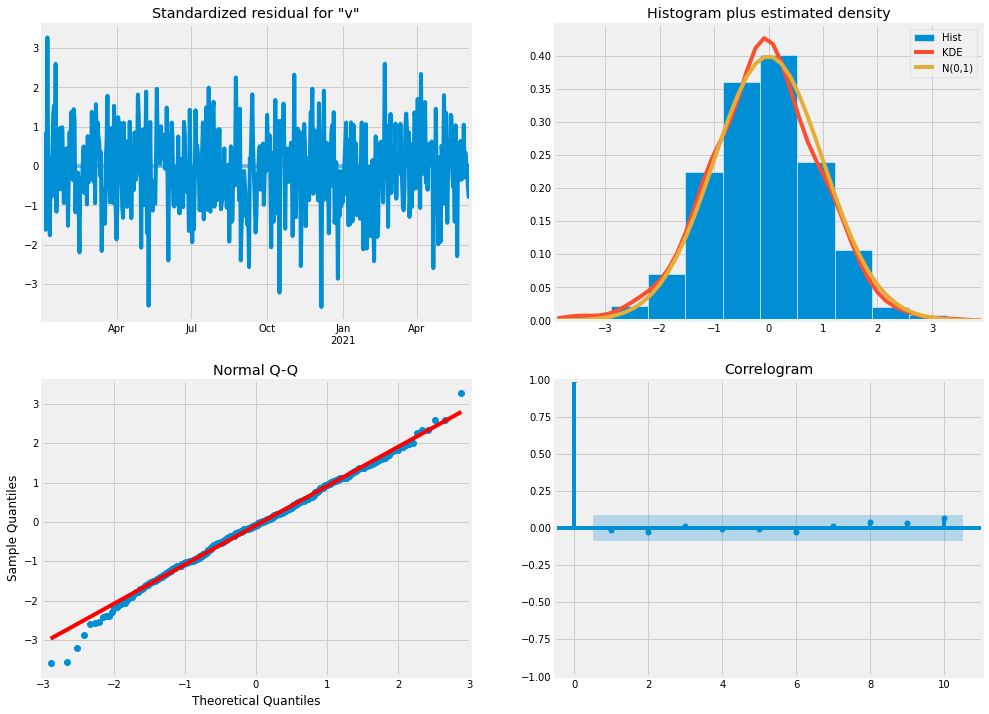

In [23]:
modelo.plot_diagnostics(figsize=(15,12))
plt.show()

## 8.

Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [29]:
data_no_diff.tail(1) # El ultimo valor es del mes 6 dia 4

,value
date,
2021-06-04,-94.24


In [31]:
fore = modelo.get_forecast(5)
fore_ci = fore.conf_int()
fore_ci

,lower value,upper value
2021-06-05,-95.967071,-92.105757
2021-06-06,-97.284231,-92.605017
2021-06-07,-98.404273,-91.127087
2021-06-08,-99.680421,-91.084592
2021-06-09,-100.657739,-89.825261


In [62]:
pred = modelo.get_prediction(start=len(data), end=len(data)+5, dynamic=False) 
# En este se empieza desde len(data) y no desde len(data) + 1 para que en el grafico se vea
# el "empate" entre el modelo y la predicción, pero si se usan estos datos 
# debe ignorarse el primer dato ya que es un dato ya observado

pred_ci = pred.conf_int(alpha = 0.05) # Intervalo de confianza 
pred_ci

,lower value,upper value
2021-06-04,-95.423297,-91.561984
2021-06-05,-95.967071,-92.105757
2021-06-06,-97.284231,-92.605017
2021-06-07,-98.404273,-91.127087
2021-06-08,-99.680421,-91.084592
2021-06-09,-100.657739,-89.825261


Se observan los intervalos de confianza, el ancho del primer intervalo ($h = 1$) es de 3.86 unidades mientras que el ancho del ultimo ($h = 5$) es de 10.83.

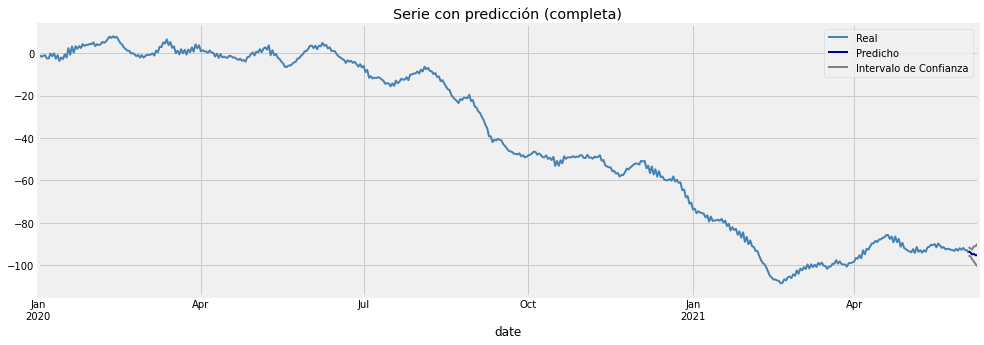

In [63]:
data_no_diff.plot(color = "steelblue", figsize=(15,5), linewidth = 2)
pred.predicted_mean.plot(color="darkblue", linewidth = 2, title = "Serie con predicción (completa)")
pred_ci.iloc[:,0].plot(color="gray", linewidth = 2)
pred_ci.iloc[:,1].plot(color="gray", linewidth = 2)
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])
plt.show()

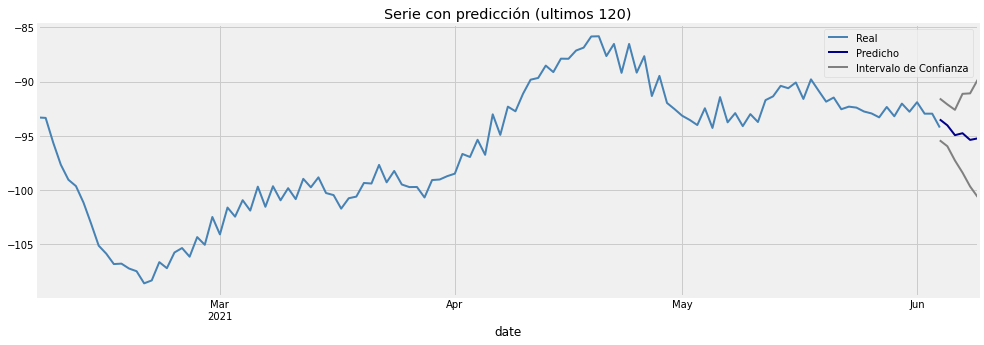

In [92]:
data_no_diff[(521-120):].plot(color = "steelblue", figsize=(15,5), linewidth = 2)
#[(521-120):] = totalfilas-120 en adelante = ultimas 120
pred.predicted_mean.plot(color="darkblue", linewidth = 2, title = "Serie con predicción (ultimos 120)")
pred_ci.iloc[:,0].plot(color="gray", linewidth = 2)
pred_ci.iloc[:,1].plot(color="gray", linewidth = 2)
# se le pone 1: para que empiece en el segundo valor (1) y no en el primero (0)
# y que no se vean dos valores en un mismo dia
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])
plt.show()

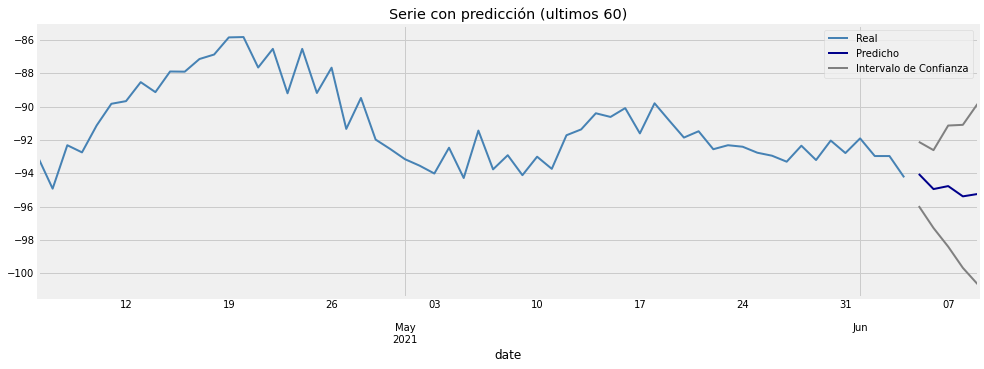

In [94]:
data_no_diff[(521-60):].plot(color = "steelblue", figsize=(15,5), linewidth = 2)
pred.predicted_mean.iloc[1:].plot(color="darkblue", linewidth = 2, title = "Serie con predicción (ultimos 60)")
pred_ci.iloc[1:,0].plot(color="gray", linewidth = 2)
pred_ci.iloc[1:,1].plot(color="gray", linewidth = 2)
# se le pone 1: para que empiece en el segundo valor (1) y no en el primero (0)
# y que no se vean dos valores en un mismo dia
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])
plt.show()

Como se puede observar el modelo predice que en los proximos 5 dias la serie va a tener un leve decaimiento.